미국에서 태어난 아이 이름 분석(1880~2010)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [2]:
names1880 = pd.read_csv("babynames/yob1880.txt", header=None, names=['name','sex','births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
# 퀴즈3: names1880에서 성별에 따른 태어난 아이들의 수 출력
names1880.groupby('sex').size()

sex
F     942
M    1058
dtype: int64

In [7]:
years=range(1880,2011)
pieces=[]

In [8]:
for year in years:
    path="babynames/yob%d.txt" %year
    frame = pd.read_csv(path, header=None, names=['name','sex','births'])
    frame['year']=year
    pieces.append(frame)

In [11]:
pieces
len(pieces)

131

In [13]:
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


### 1. 연도 및 성별로 그룹화 -> 태어난 아이의 수 -> 시각화
선그래프(남/여)
x축 year, y축 태어난 아이의 수 합계

In [116]:
year_s_f = names[names['sex']=='F'].groupby('year')['births'].sum()
year_s_f

year
1880      90993
1881      91955
1882     107851
1883     112322
1884     129021
         ...   
2006    1896468
2007    1916888
2008    1883645
2009    1827643
2010    1759010
Name: births, Length: 131, dtype: int64

In [119]:
year_s_m = names[names['sex']=='M'].groupby('year')['births'].sum()
year_s_m

year
1880     110493
1881     100748
1882     113687
1883     104632
1884     114445
         ...   
2006    2050234
2007    2069242
2008    2032310
2009    1973359
2010    1898382
Name: births, Length: 131, dtype: int64

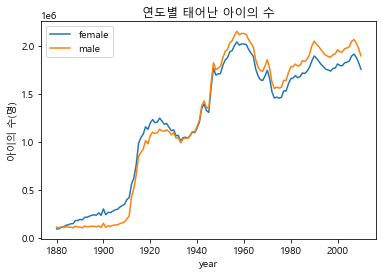

In [120]:
sf = year_s_f.plot()
sm = year_s_m.plot()
plt.title("연도별 태어난 아이의 수")
plt.ylabel("아이의 수(명)")
plt.legend(("female","male"), loc=2)
plt.show()

In [126]:
s_diff = abs(year_s_f.values - year_s_m.values)
s_diff

array([ 19500,   8793,   5836,   7690,  14576,  25254,  33753,  44571,
        57774,  67779,  79351,  84288,  90312, 100589, 107148, 116234,
       118349, 121439, 136068, 126804, 149319, 132873, 141419, 142736,
       147246, 159322, 162142, 171720, 179938, 183208, 202218, 192244,
       128013, 111835, 106630, 135177, 154107, 155682, 143865, 149934,
       133746, 131471, 112416, 110012, 116150, 101419,  74638,  65948,
        45723,  41451,  28858,  25647,  23418,  16846,  11917,   7615,
         3406,   2242,   5307,   9934,  15387,  19822,  29944,  31509,
        35302,  38928,  51985,  55169,  55808,  60497,  76935,  79016,
        89106,  88700,  95386, 102882, 105651, 111444, 109394, 110258,
       110526, 104867, 102153, 104388,  98485,  96323,  91927,  93646,
        98608, 102621, 110971, 105282, 101134, 100649, 105188, 104029,
       104246, 110173, 109901, 116193, 123129, 122735, 120606, 121184,
       120339, 126712, 125389, 127605, 132746, 156783, 154814, 144908,
      

In [134]:
print(max(s_diff))  #202218: 여자아이와 남자아이 수의 최대격차
print(year_s_f.index[np.where(s_diff==max(s_diff))][0])  #1910: 가장 차이 큰 해

202218
1910


In [135]:
print(min(s_diff))  #2242: 여자아이와 남자아이 수의 최소격차
print(year_s_f.index[np.where(s_diff==min(s_diff))][0])  #1937: 가장 차이 작은 해

2242
1937


1880년대에는 여아의 수가 더 많았으나,  약 1940년대부터 반전되며 남아의 수가 더 많아지기 시작했다.
가장 큰 차이를 보인 해는 1910년으로 202218명이 차이났고, 가장 작은 차이를 보인 해는 1937년으로 2242명이 차이났다.

### 2. names에 prop열 추가
prop열은 연도별 각각의 이름에 해당되는 아이의 수를 그 해에 태어난 전체 아이의 수로 나눈 값

In [166]:
year_s = names.groupby('year')[['births']].sum().reset_index()
year_s.rename(columns ={'births':'prop'}, inplace=True)
year_s

,year,prop
0,1880,201486
1,1881,192703
2,1882,221538
3,1883,216954
4,1884,243466
...,...,...
126,2006,3946702
127,2007,3986130
128,2008,3915955
129,2009,3801002


In [175]:
p_names = names.merge(year_s, on="year")
p_names['prop'] = (p_names['births'] / p_names['prop'] * 100)
p_names

,name,sex,births,year,prop
0,Mary,F,7065,1880,3.506447
1,Anna,F,2604,1880,1.292397
2,Emma,F,2003,1880,0.994114
3,Elizabeth,F,1939,1880,0.962350
4,Minnie,F,1746,1880,0.866561
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000137
1690780,Zyonne,M,5,2010,0.000137
1690781,Zyquarius,M,5,2010,0.000137
1690782,Zyran,M,5,2010,0.000137


In [186]:
max_prop = p_names.groupby('year')['name','prop'].max() #각 해마다 가장 비율이 높았던 이름과 비율값
max_prop

,name,prop
year,,
1880,Zula,4.791896
1881,Zula,4.550526
1882,Zula,4.313933
1883,Zula,4.099487
1884,Zula,3.855569
...,...,...
2006,Zytavious,0.628297
2007,Zytavious,0.607507
2008,Zyshawn,0.574751


In [192]:
max_prop['name'].unique()  #가장 많이 사용된 이름 리스트(중복 제거)

array(['Zula', 'Zuma', 'Zylpha', 'Zura', 'Zulema', 'Zygmund', 'Zylphia',
       'Zygmunt', 'Zulma', 'Zvi', 'Zyndall', 'Zuri', 'Zyanya', 'Zykia',
       'Zykeia', 'Zyon', 'Zyria', 'Zyshonne', 'Zytavious', 'Zyshawn',
       'Zyvion', 'Zzyzx'], dtype=object)

### 3. names에서 연도별, 성별에 따른 가장 많은 이름을 1000개씩 추출
1880년 여자 => 메리, 에나, ...
1880년 남자 => 존, 마이클, ...

In [213]:
def top1000(df, column):
    return df.sort_values(by=column, ascending=False)[:1000]

In [218]:
# 여아의 연도별 가장 많은 이름 1000개
names[names['sex']=='F'].groupby("year").apply(top1000, column="births")[['name']]

name
year                   
1880 0             Mary
     1             Anna
     2             Emma
     3        Elizabeth
     4           Minnie
...                 ...
2010 1657943    Violeta
     1657942     Leilah
     1657941    Alaysia
     1657945      Dania
     1657946     Yadira

[130880 rows x 1 columns]

In [217]:
# 남아의 연도별 가장 많은 이름 1000개
names[names['sex']=='M'].groupby("year").apply(top1000, column="births")[['name']]

name
year                 
1880 942         John
     943      William
     944        James
     945      Charles
     946       George
...               ...
2010 1677639   Camilo
     1677640   Destin
     1677641   Jaquan
     1677642   Jaydan
     1677645   Maxton

[130997 rows x 1 columns]

### 4. John, Mary, Harry에 대해 시각화
John, Mary, Harry 해당 이름의 유행 변화
x축: year
y축: 태어난 아이의 수

In [220]:
john = names[names['name']=='John'].groupby('year').sum()
john

,births
year,
1880,9701
1881,8795
1882,9597
1883,8934
1884,9427
...,...
2006,15175
2007,14427
2008,13294


In [221]:
mary = names[names['name']=='Mary'].groupby('year').sum()
mary

,births
year,
1880,7092
1881,6948
1882,8179
1883,8044
1884,9253
...,...
2006,4083
2007,3674
2008,3478


In [222]:
harry = names[names['name']=='Harry'].groupby('year').sum()
harry

,births
year,
1880,2158
1881,2002
1882,2246
1883,2116
1884,2338
...,...
2006,414
2007,443
2008,379


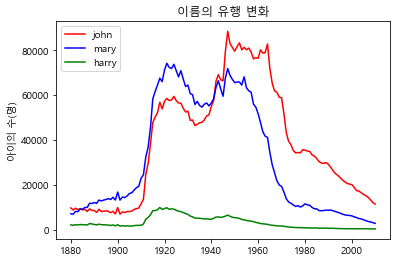

In [232]:
plt.plot(john.index, john, 'r-', 
         mary.index, mary, 'b-',
         harry.index, harry, 'g-')
plt.title("이름의 유행 변화")
plt.ylabel("아이의 수(명)")
plt.legend(("john","mary","harry"), loc=2)
plt.show()

### 5. 이름의 다양성 변화 분석(각자의 아이디어)
1880년 여자 아이들의 이름의 종류:942
2010년 여자 아이들의 이름의 종류:19698
=> 이름이 매우 다양해졌다
시각화
x축: year
y축: 이름의 종류 수
선그래프, 성별

In [233]:
year_n_f = names[names['sex']=='F'].groupby('year').size()
year_n_m = names[names['sex']=='M'].groupby('year').size()

In [234]:
year_n_f

year
1880      942
1881      938
1882     1028
1883     1054
1884     1172
        ...  
2006    20028
2007    20520
2008    20416
2009    20123
2010    19698
Length: 131, dtype: int64

In [235]:
year_n_m

year
1880     1058
1881      997
1882     1099
1883     1030
1884     1125
        ...  
2006    14011
2007    14363
2008    14590
2009    14479
2010    14140
Length: 131, dtype: int64

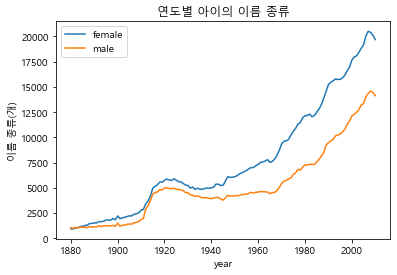

In [236]:
pf = year_n_f.plot()
pm = year_n_m.plot()
plt.title("연도별 아이의 이름 종류")
plt.ylabel("이름 종류(개)")
plt.legend(("female","male"), loc=2)
plt.show()

In [237]:
diff = abs(year_n_f.values - year_n_m.values)
print(max(diff))  #6157: 여자아이와 남자아이 이름 종류의 최대격차
print(year_n_f.index[np.where(diff==max(diff))][0])  #2007: 가장 차이 큰 해

6157
2007


1880년대에는 남아의 이름 종류가 더 많았으나, 1881년부터 반전되며 여아의 이름 종류가 더 많아졌다.
이후, 약 1940년대부터 여자아이와 남자아이 수의 격차가 크게 증가했고 2007년에 6457명으로 가장 큰 차이를 보였다.
여아와 남아의 이름 종류 모두 증가하는 양상을 보였다.